img shape :(200, 200, 3)
Origin


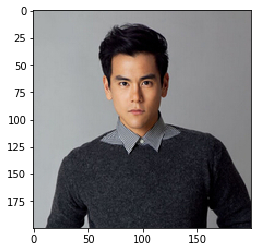

Mean filter


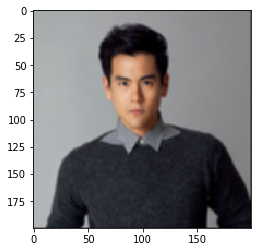

Prewitt filter


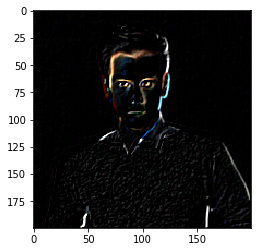

Sobel filter


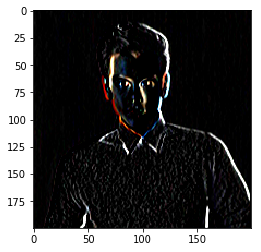

Log filter


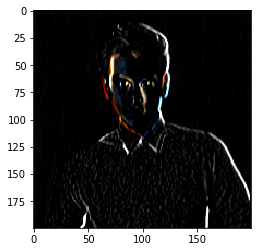

In [2]:
'''
convolve(a, v, mode=‘full’)，同numpy函數中的convolve 使用方式
　　參數：
　　　　a:(N,)輸入的數組
　　　　b:(M,)輸入的Convolution kernel
　　　　mode:{"full", "valid", "same"}
　　　　　　"full"　Default value，返回每一個卷積值，在卷積的邊緣處，訊號不重疊，存在邊際效應。
　　　　　　"same"　返回數組長度max(M, N),存在邊際效應。
　　　　　　"valid" 返回數組長度max(M,N)-min(M,N)+1,完全重疊，沒有邊際效應。
'''
import matplotlib.pyplot as plt
import pylab
import numpy as np
import scipy.misc
def convolve(img,fil,mode = 'same'):               #img 需要三通道

    if mode == 'fill':
        h = fil.shape[0] // 2
        w = fil.shape[1] // 2
        img = np.pad(img, ((h, h), (w, w),(0, 0)), 'constant')
    conv_b = _convolve(img[:,:,0],fil)              #分別做卷積
    conv_g = _convolve(img[:,:,1],fil)
    conv_r = _convolve(img[:,:,2],fil)

    dstack = np.dstack([conv_b,conv_g,conv_r])      #卷積完成後合併三通道
    return dstack                                   #返回結果
def _convolve(img,fil):         
    
    fil_heigh = fil.shape[0]                        #取得卷積kernel高度
    fil_width = fil.shape[1]                        #取得卷積kernel寬度
    
    conv_heigh = img.shape[0] - fil.shape[0] + 1    #定義卷積厚的寬高結果
    conv_width = img.shape[1] - fil.shape[1] + 1

    conv = np.zeros((conv_heigh,conv_width),dtype = 'uint8')
    
    for i in range(conv_heigh):
        for j in range(conv_width):                 #逐點相乘並合併結果
            conv[i][j] = wise_element_sum(img[i:i + fil_heigh,j:j + fil_width ],fil)
    return conv
    
def wise_element_sum(img,fil):
    res = (img * fil).sum() 
    if(res < 0):
        res = 0
    elif res > 255:
        res  = 255
    return res

#Reference https://www.itread01.com/content/1541476929.html
img = plt.imread("./img/Eddie.jpg")
print("img shape :" + str(img.shape))
print("Origin")
plt.imshow(img)                                     
plt.show()

#均值慮波 (mean filter)
fil = np.array([[1, 1, 1],
                [1, 1, 1],
                [1, 1, 1]])/9
res = convolve(img,fil,'fill')
print("Mean filter")
plt.imshow(res)                                     
plt.show()

#Prewitt
fil = np.array([[-1,-1, 0],
                [-1, 0, 1],
                [ 0, 1, 1]])
res = convolve(img,fil,'fill')
#顯示卷積後的圖片
print("Prewitt filter")
plt.imshow(res)                                     
pylab.show()

#Sobel 
fil = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])
res = convolve(img,fil,'fill')
print("Sobel filter")
plt.imshow(res)                                     
pylab.show()

#Log
fil = np.array([[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]])
res = convolve(img,fil,'fill')
print("Log filter")
plt.imshow(res)                                     
pylab.show()